In [ ]:
import pandas as pd
df = pd.read_csv('/content/dff1.csv')

In [ ]:
df.head(10)

,call_id,primary_call_reason,customer_id,agent_id,call_start_datetime,agent_assigned_datetime,call_end_datetime,call_transcript,agent_tone,customer_tone,average_sentiment,silence_percent_average,customer_name,elite_level_code,AST,AHT
0,4667960400,voluntary cancel,2033123310,963118,31-07-2024 23:56,01-08-2024 00:03,01-08-2024 00:34,\n\nAgent: Thank you for calling United Airlin...,neutral,angry,-0.04,0.39,Matthew Foster,4.0,420,1860
1,1122072124,booking,8186702651,519057,01-08-2024 00:03,01-08-2024 00:06,01-08-2024 00:18,\n\nAgent: Thank you for calling United Airlin...,calm,neutral,0.02,0.35,Tammy Walters,NaN,180,720
2,6834291559,irrops,2416856629,158319,31-07-2024 23:59,01-08-2024 00:07,01-08-2024 00:26,\n\nAgent: Thank you for calling United Airlin...,neutral,polite,-0.13,0.32,Jeffery Dixon,NaN,480,1140
3,2266439882,upgrade,1154544516,488324,01-08-2024 00:05,01-08-2024 00:10,01-08-2024 00:17,\n\nAgent: Thank you for calling United Airlin...,neutral,frustrated,-0.20,0.20,David Wilkins,2.0,300,420
4,1211603231,seating,5214456437,721730,01-08-2024 00:04,01-08-2024 00:14,01-08-2024 00:23,\n\nAgent: Thank you for calling United Airlin...,neutral,polite,-0.05,0.35,Elizabeth Daniels,0.0,600,540
5,5297766997,mileage plus,5590154991,817160,01-08-2024 00:11,01-08-2024 00:16,01-08-2024 00:40,\n\nAgent: Thank you for calling United Airlin...,calm,calm,0.10,0.11,Emily Alexander,5.0,300,1440
6,324593040,checkout,6774865122,519057,01-08-2024 00:08,01-08-2024 00:21,01-08-2024 00:34,\n\nAgent: Thank you for calling United Airlin...,neutral,frustrated,0.00,0.25,James Lawrence,NaN,780,780
7,8902603117,mileage plus,7974326984,488324,01-08-2024 00:13,01-08-2024 00:21,01-08-2024 00:29,\n\nAgent: Thank you for calling United Airlin...,calm,angry,0.11,0.35,Megan Craig,2.0,480,480
8,7222687732,mileage plus,8023417234,957331,01-08-2024 00:14,01-08-2024 00:22,01-08-2024 00:35,\n\nAgent: Thank you for calling United Airlin...,calm,neutral,0.06,0.54,Alexa Martinez,1.0,480,780
9,4113684017,irrops,1528835057,158319,01-08-2024 00:20,01-08-2024 00:28,01-08-2024 00:37,\n\nAgent: Thank you for calling United Airlin...,neutral,angry,-0.19,0.29,Jonathan Parker,NaN,480,540


In [ ]:
print(df.shape)

(66653, 16)


In [ ]:
# Convert 'call_start_time' to datetime if it's not already
df['call_start_datetime'] = pd.to_datetime(df['call_start_datetime'])

# Extract hour from the timestamp
df['hour_of_day'] = df['call_start_datetime'].dt.hour

# Define a function to categorize the time of day
def categorize_time_of_day(hour):
    if 0 <= hour < 5:
        return 'Early Morning'
    elif 5 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 17:
        return 'Afternoon'
    elif 17 <= hour < 21:
        return 'Evening'
    else:
        return 'Night'

# Apply the categorization
df['time_of_day'] = df['hour_of_day'].apply(categorize_time_of_day)

# Verify the new column
print(df[['call_start_datetime', 'hour_of_day', 'time_of_day']].head())

  call_start_datetime  hour_of_day    time_of_day
0 2024-07-31 23:56:00           23          Night
1 2024-08-01 00:03:00            0  Early Morning
2 2024-07-31 23:59:00           23          Night
3 2024-08-01 00:05:00            0  Early Morning
4 2024-08-01 00:04:00            0  Early Morning


<ipython-input-6-1808a9c6ae90>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='time_of_day', y='AHT', data=time_of_day_stats, palette='coolwarm')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grou

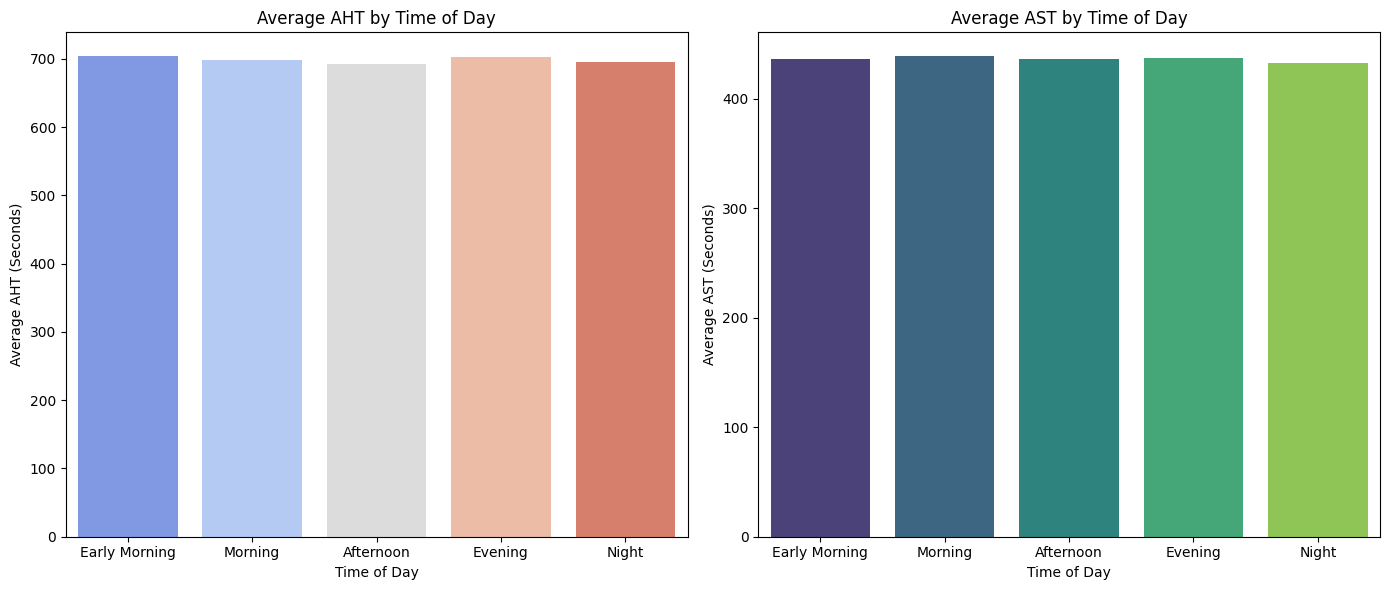

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group by time_of_day and calculate the average AHT and AST
time_of_day_stats = df.groupby('time_of_day')[['AHT', 'AST']].mean().reset_index()

# Sort the data by time of day for better visualization
time_of_day_order = ['Early Morning', 'Morning', 'Afternoon', 'Evening', 'Night']
time_of_day_stats['time_of_day'] = pd.Categorical(time_of_day_stats['time_of_day'], categories=time_of_day_order, ordered=True)
time_of_day_stats.sort_values('time_of_day', inplace=True)

# Plot average AHT and AST by time of day
plt.figure(figsize=(14, 6))

# Plot AHT
plt.subplot(1, 2, 1)
sns.barplot(x='time_of_day', y='AHT', data=time_of_day_stats, palette='coolwarm')
plt.title('Average AHT by Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Average AHT (Seconds)')

# Plot AST
plt.subplot(1, 2, 2)
sns.barplot(x='time_of_day', y='AST', data=time_of_day_stats, palette='viridis')
plt.title('Average AST by Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Average AST (Seconds)')

plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assume 'filtered_data' already has the 'time_of_day' column created as discussed earlier
# If not, follow the earlier step to create 'time_of_day' based on call start time

# Group by time_of_day and primary_call_reason and count the number of occurrences
call_frequency = df.groupby(['time_of_day', 'primary_call_reason']).size().reset_index(name='call_count')

# Create a pivot table to structure data for the heatmap
call_frequency_pivot = call_frequency.pivot(index='primary_call_reason', columns='time_of_day', values='call_count').fillna(0)

# Verify the pivot table structure
print(call_frequency_pivot.head(20))


time_of_day            Afternoon  Early Morning  Evening  Morning  Night
primary_call_reason                                                     
baggage                     1075            222      474      940    121
booking                      985            230      419      876    127
check in                     751            139      304      623     87
checkout                     691            161      321      616     99
communications              1447            296      614     1285    198
digital support              463             73      210      429     50
disability                   146             31       76      140     10
etc                          342             67      142      358     43
irrops                      4784            964     2288     4650    625
mileage plus                2150            436     1037     1944    284
other topics                 296             67      150      261     44
post flight                 1563            333    

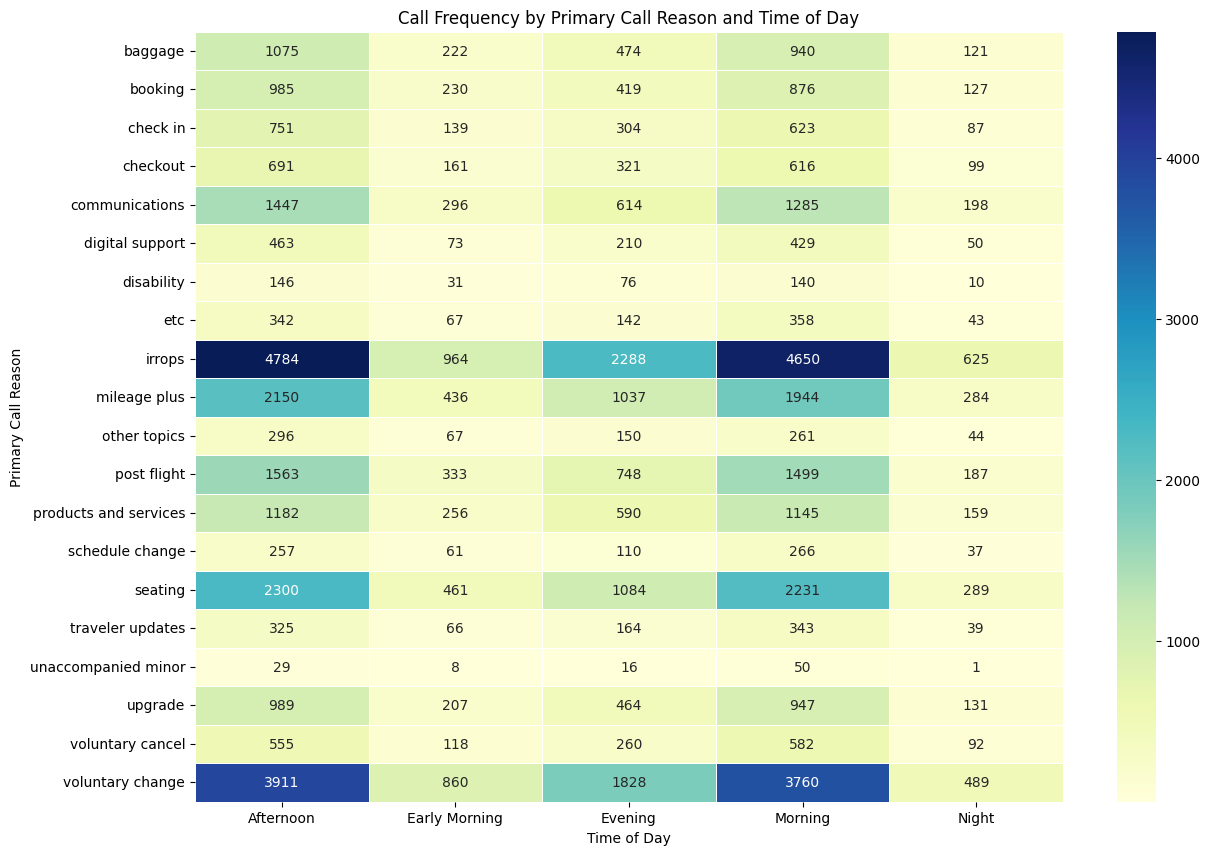

In [ ]:
# Set up the matplotlib figure
plt.figure(figsize=(14, 10))

# Create a heatmap with annotations
sns.heatmap(call_frequency_pivot, annot=True, fmt=".0f", cmap='YlGnBu', linewidths=.5)

# Add title and labels
plt.title('Call Frequency by Primary Call Reason and Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Primary Call Reason')

# Show the plot
plt.show()


In [ ]:
mean_aht_by_reason = df.groupby('primary_call_reason')['AHT'].mean().reset_index()

# Step 2: Rename the columns for better clarity
mean_aht_by_reason.columns = ['Primary Call Reason', 'Mean AHT (Seconds)']

# Display the resulting DataFrame
print(mean_aht_by_reason)

      Primary Call Reason  Mean AHT (Seconds)
0                 baggage          333.644068
1                 booking          427.736064
2                check in          574.128151
3                checkout         1016.853814
4          communications          826.718750
5         digital support          372.293878
6              disability          292.109181
7                     etc          962.899160
8                  irrops          785.116069
9            mileage plus          995.573406
10           other topics          350.097800
11            post flight          932.896074
12  products and services          746.560624
13        schedule change          490.013680
14                seating          474.994501
15       traveler updates          393.233725
16    unaccompanied minor          519.230769
17                upgrade          632.344777
18       voluntary cancel          721.866833
19       voluntary change          639.153761


<ipython-input-26-5d1fc761c1cf>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tup

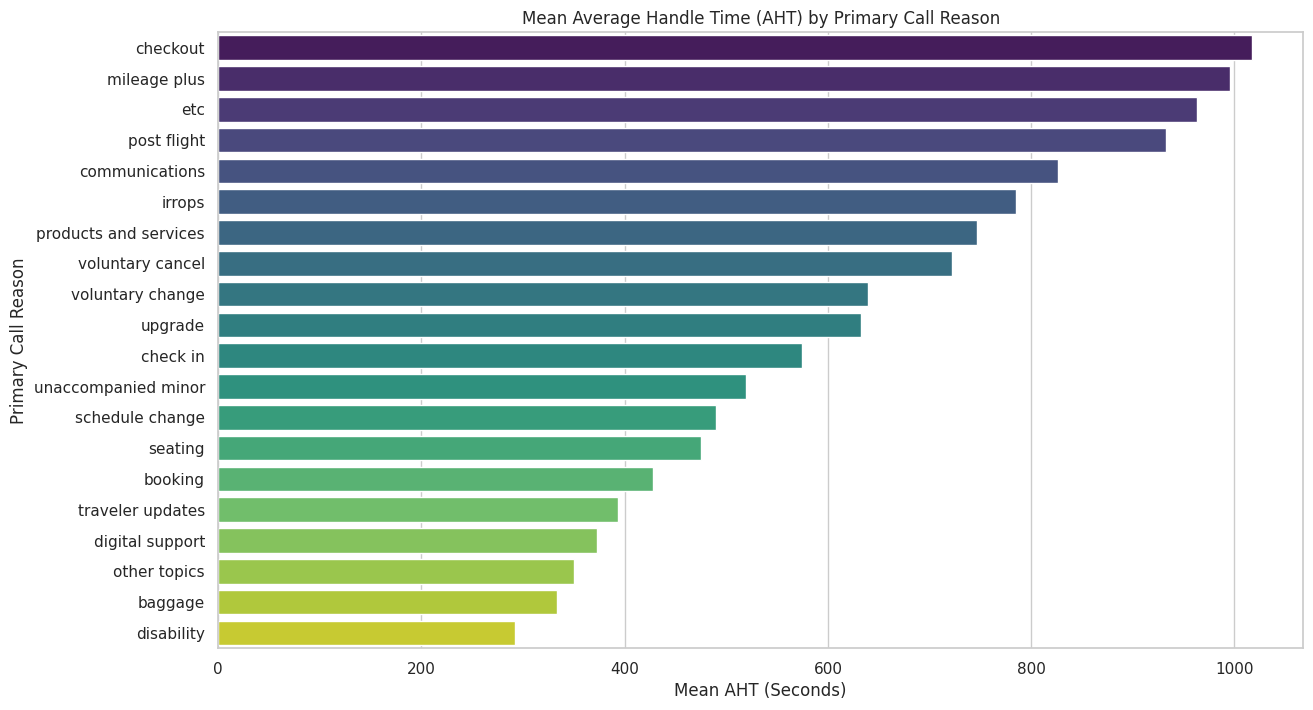

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Calculate mean AHT by primary call reason (assuming the grouped data is named mean_aht_by_reason)
# If not calculated yet, uncomment and run the following line:
# mean_aht_by_reason = data.groupby('primary_call_reason')['AHT'].mean().reset_index()

# Step 2: Sort the values to make the visualization more readable
mean_aht_by_reason_sorted = mean_aht_by_reason.sort_values(by='Mean AHT (Seconds)', ascending=False)

# Step 3: Plotting
plt.figure(figsize=(14, 8))
sns.barplot(
    x='Mean AHT (Seconds)',
    y='Primary Call Reason',
    data=mean_aht_by_reason_sorted,
    palette='viridis'
)

# Step 4: Add titles and labels
plt.title('Mean Average Handle Time (AHT) by Primary Call Reason')
plt.xlabel('Mean AHT (Seconds)')
plt.ylabel('Primary Call Reason')

# Step 5: Display the plot
plt.show()


What are the primary reasons for calls with the highest and lowest AHT?

In [ ]:
print("Top 5 Call Reasons with Highest AHT:")
print(mean_aht_by_reason_sorted.head())

print("\nTop 5 Call Reasons with Lowest AHT:")
print(mean_aht_by_reason_sorted.tail())

Top 5 Call Reasons with Highest AHT:
   Primary Call Reason  Mean AHT (Seconds)
3             checkout         1016.853814
9         mileage plus          995.573406
7                  etc          962.899160
11         post flight          932.896074
4       communications          826.718750

Top 5 Call Reasons with Lowest AHT:
   Primary Call Reason  Mean AHT (Seconds)
15    traveler updates          393.233725
5      digital support          372.293878
10        other topics          350.097800
0              baggage          333.644068
6           disability          292.109181


In [ ]:
# Calculate mean values for each contributing factor by primary call reason
mean_factors_by_reason = df.groupby('primary_call_reason')[['AHT','average_sentiment', 'silence_percent_average']].mean().reset_index()

# Display the results
mean_factors_by_reason_sorted = mean_factors_by_reason.sort_values(by='AHT', ascending=False)
mean_factors_by_reason_sorted.head()


,primary_call_reason,AHT,average_sentiment,silence_percent_average
3,checkout,1016.853814,-0.069030,0.292309
9,mileage plus,995.573406,-0.027398,0.275038
7,etc,962.899160,-0.049327,0.287563
11,post flight,932.896074,-0.063914,0.297804
4,communications,826.718750,-0.036392,0.303578


In [ ]:
# Recalculate correlation
correlation = mean_factors_by_reason[['AHT', 'average_sentiment', 'silence_percent_average']].corr()
print("Correlation Matrix:\n", correlation)


Correlation Matrix:
                               AHT  average_sentiment  silence_percent_average
AHT                      1.000000          -0.700412                 0.628800
average_sentiment       -0.700412           1.000000                -0.619377
silence_percent_average  0.628800          -0.619377                 1.000000


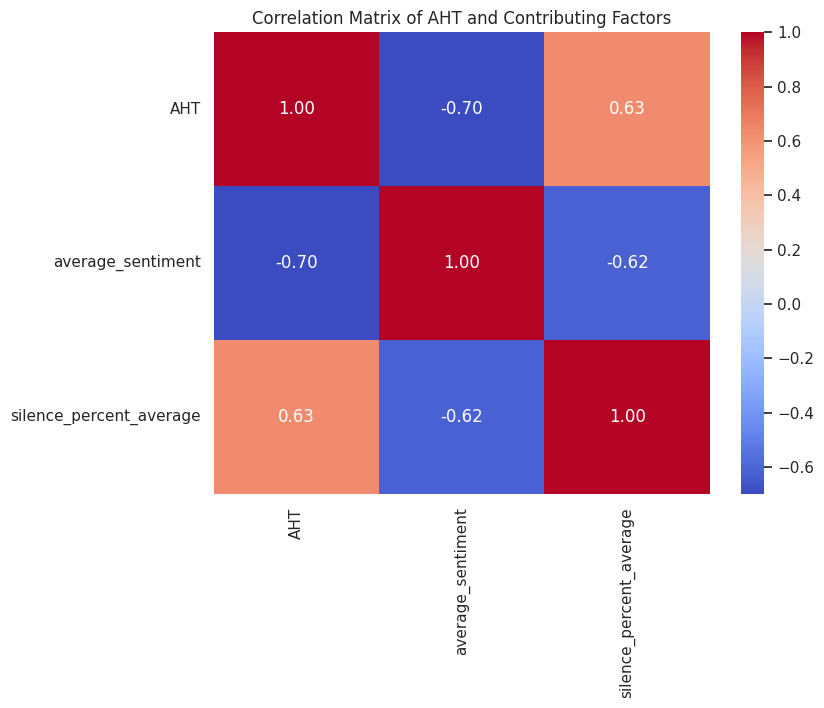

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of AHT and Contributing Factors')
plt.show()


Conclusions


1. Impact of Long AHT: The strong negative correlation between AHT and average sentiment indicates that improving call efficiency (reducing AHT) could significantly enhance customer satisfaction. It suggests that addressing the reasons behind prolonged call durations—such as training agents to handle calls more effectively—might improve customer experience.



2. Silence as a Factor: The correlation between AHT and silence percent suggests that prolonged calls may not only be due to customer issues but also the agent's response time or the information they need to gather. Analyzing call recordings with higher silence percentages could provide insights into training needs for agents to minimize delays.



3. Customer Engagement: The negative correlation between silence and sentiment reinforces the idea that customers prefer more active engagement during calls. Reducing periods of silence by encouraging agents to maintain a dialogue or check in with customers during pauses could help improve customer sentiment.




Actionable Insights


1. Training Programs: Consider developing training programs focused on improving agent response times and communication skills to reduce AHT and enhance customer sentiment.


2. Call Monitoring: Implementing call monitoring practices to analyze longer calls and silence periods may help identify specific areas for improvement.


3. Feedback Mechanism: Gathering customer feedback post-call can help correlate specific call experiences with sentiment, enabling further refinement of customer service strategies.

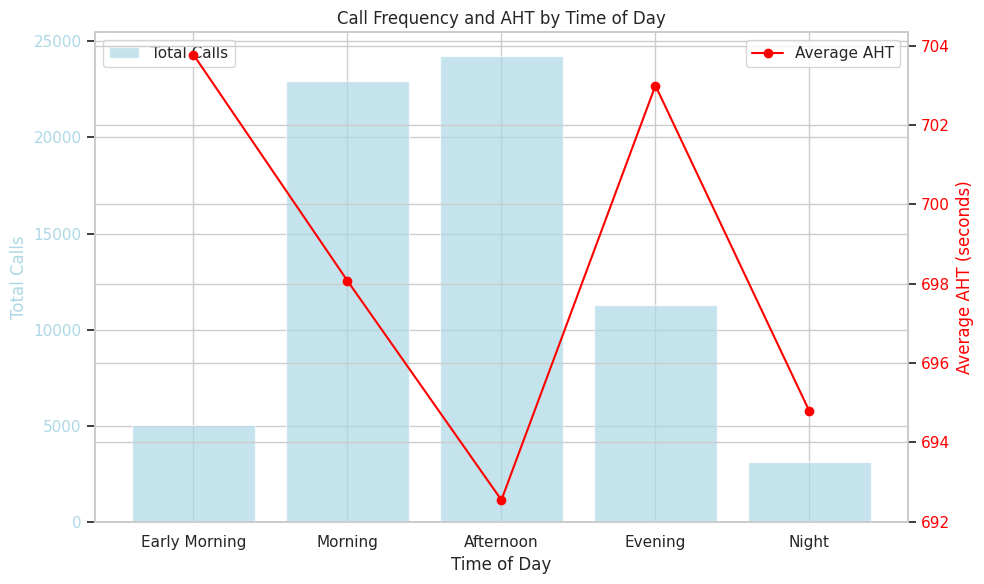

In [ ]:
# Group by 'time_of_day' to get total calls and average AHT
time_of_day_analysis = df.groupby('time_of_day').agg(
    total_calls=('call_id', 'count'),  # Count the number of calls using 'call_id'
    average_aht=('AHT', 'mean')        # Calculate the mean AHT
).reset_index()

# Define the order of time slots
time_order = ['Early Morning', 'Morning', 'Afternoon', 'Evening', 'Night']
time_of_day_analysis['time_of_day'] = pd.Categorical(time_of_day_analysis['time_of_day'], categories=time_order, ordered=True)

# Sorting the DataFrame based on the specified time order
time_of_day_analysis = time_of_day_analysis.sort_values('time_of_day')

# Plotting the data
fig, ax1 = plt.subplots(figsize=(10, 6))

# Bar plot for total calls
color = 'lightblue'
ax1.set_xlabel('Time of Day')
ax1.set_ylabel('Total Calls', color=color)
ax1.bar(time_of_day_analysis['time_of_day'], time_of_day_analysis['total_calls'], color=color, alpha=0.7, label='Total Calls')
ax1.tick_params(axis='y', labelcolor=color)

# Creating a second y-axis for AHT
ax2 = ax1.twinx()
color = 'red'
ax2.set_ylabel('Average AHT (seconds)', color=color)
ax2.plot(time_of_day_analysis['time_of_day'], time_of_day_analysis['average_aht'], color=color, marker='o', label='Average AHT')
ax2.tick_params(axis='y', labelcolor=color)

# Title and legend
plt.title('Call Frequency and AHT by Time of Day')
fig.tight_layout()
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Show the plot
plt.show()


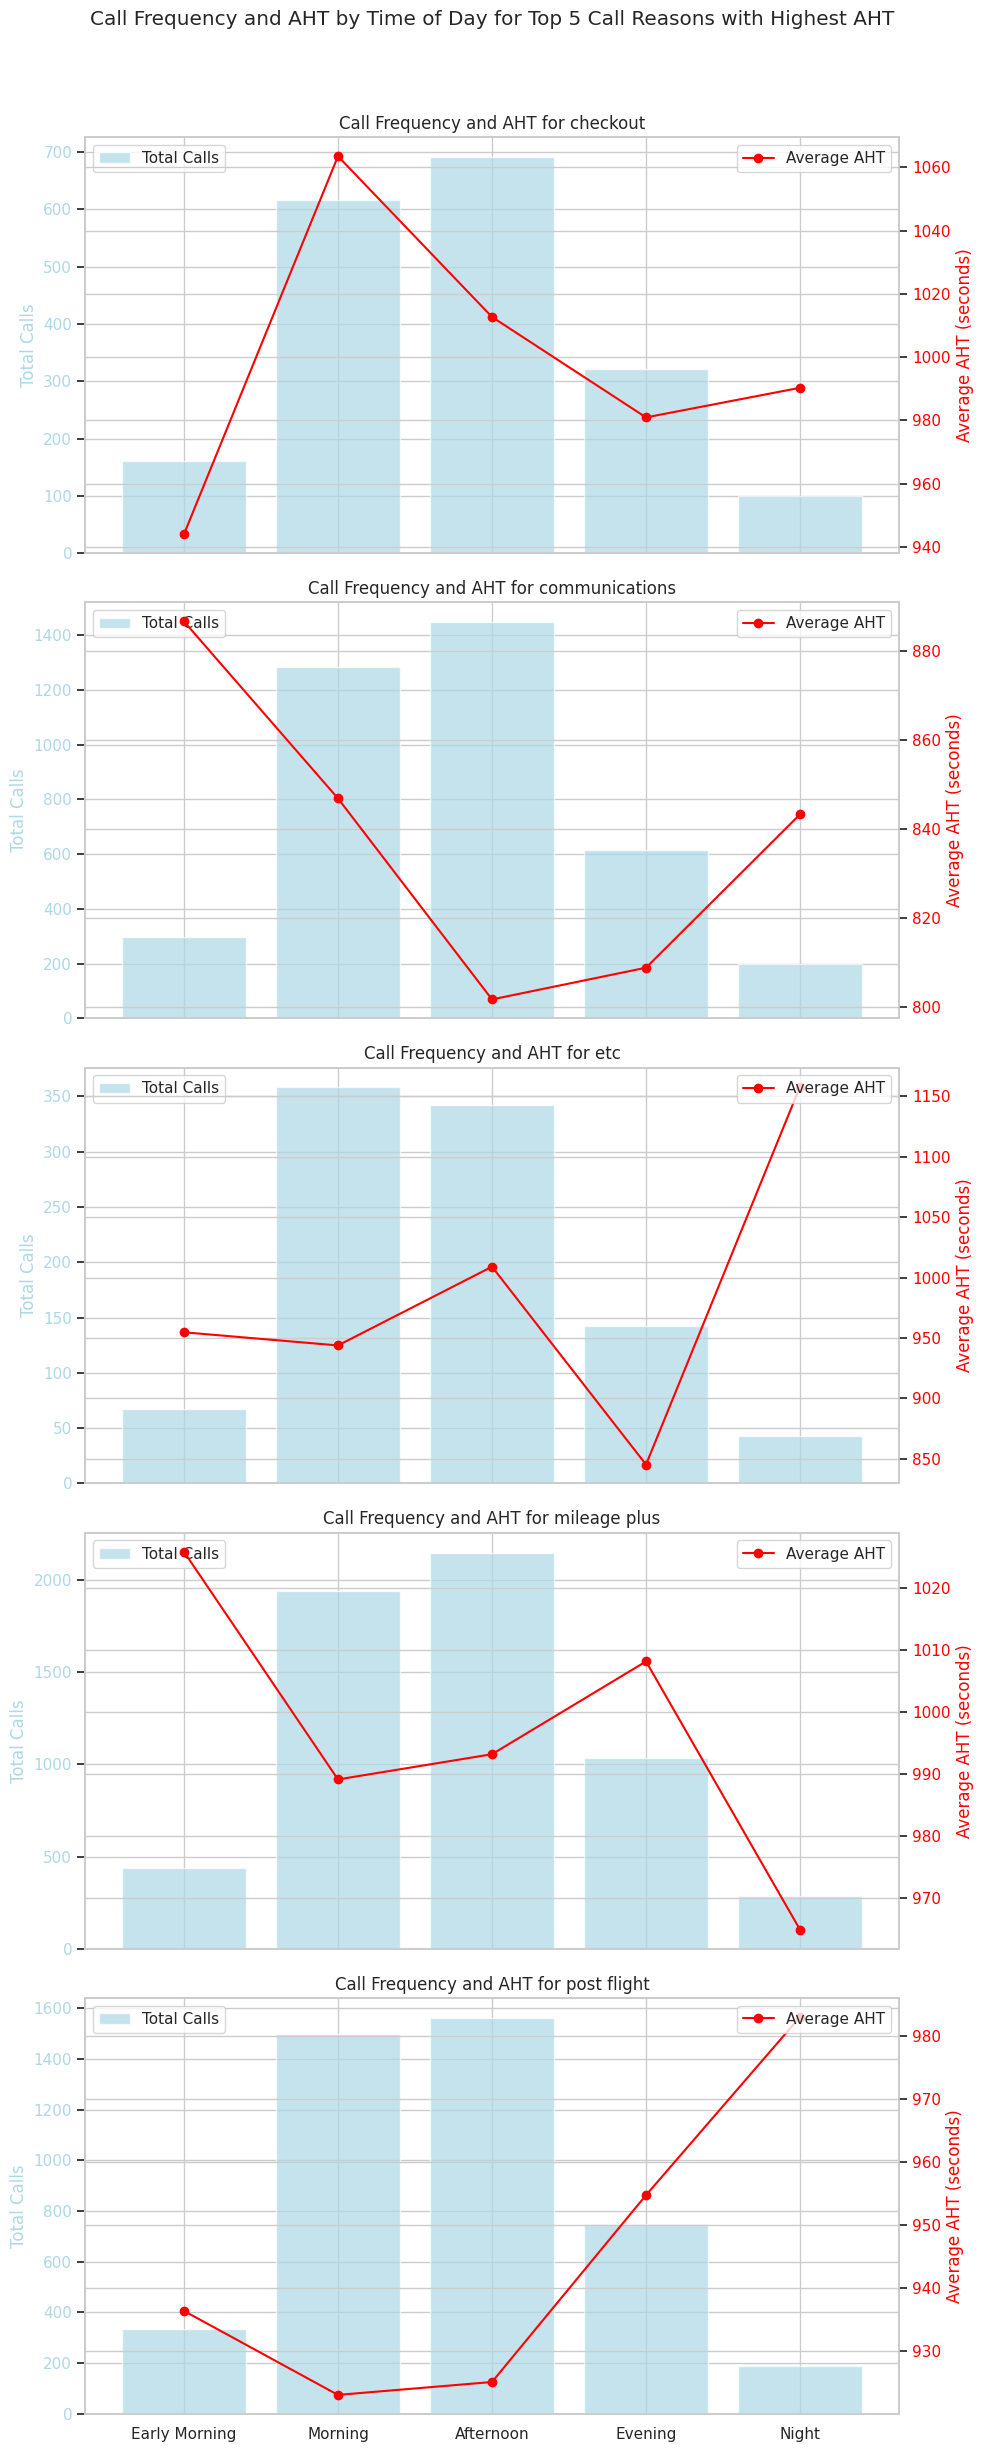

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your DataFrame already loaded with relevant data

# 1. Group by primary_call_reason to calculate mean AHT and find the top 5 call reasons by AHT
top_aht_reasons = df.groupby('primary_call_reason')['AHT'].mean().nlargest(5).index.tolist()

# 2. Filter the DataFrame for only the top 5 call reasons by AHT
df_top_aht_reasons = df[df['primary_call_reason'].isin(top_aht_reasons)]

# 3. Group by time_of_day and primary_call_reason to get total calls and average AHT
time_of_day_analysis = df_top_aht_reasons.groupby(['time_of_day', 'primary_call_reason']).agg(
    total_calls=('call_id', 'count'),  # Count the number of calls using 'call_id'
    average_aht=('AHT', 'mean')        # Calculate the mean AHT
).reset_index()

# 4. Define the order of time slots
time_order = ['Early Morning', 'Morning', 'Afternoon', 'Evening', 'Night']
time_of_day_analysis['time_of_day'] = pd.Categorical(time_of_day_analysis['time_of_day'], categories=time_order, ordered=True)

# 5. Sorting the DataFrame based on the specified time order
time_of_day_analysis = time_of_day_analysis.sort_values('time_of_day')

# 6. Create subplots for each of the top 5 call reasons with the highest AHT
unique_reasons = time_of_day_analysis['primary_call_reason'].unique()
n_reasons = len(unique_reasons)

fig, axes = plt.subplots(n_reasons, 1, figsize=(10, n_reasons * 5), sharex=True)

for i, reason in enumerate(unique_reasons):
    ax = axes[i]
    reason_data = time_of_day_analysis[time_of_day_analysis['primary_call_reason'] == reason]

    # Bar plot for total calls
    color = 'lightblue'
    ax.bar(reason_data['time_of_day'], reason_data['total_calls'], color=color, alpha=0.7, label='Total Calls')
    ax.set_ylabel('Total Calls', color=color)
    ax.tick_params(axis='y', labelcolor=color)

    # Line plot for AHT
    color = 'red'
    ax2 = ax.twinx()
    ax2.plot(reason_data['time_of_day'], reason_data['average_aht'], color=color, marker='o', label='Average AHT')
    ax2.set_ylabel('Average AHT (seconds)', color=color)
    ax2.tick_params(axis='y', labelcolor=color)

    # Title for each subplot
    ax.set_title(f'Call Frequency and AHT for {reason}')

    # Legends
    ax.legend(loc='upper left')
    ax2.legend(loc='upper right')

# Overall title
plt.suptitle('Call Frequency and AHT by Time of Day for Top 5 Call Reasons with Highest AHT')
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to fit title
plt.show()


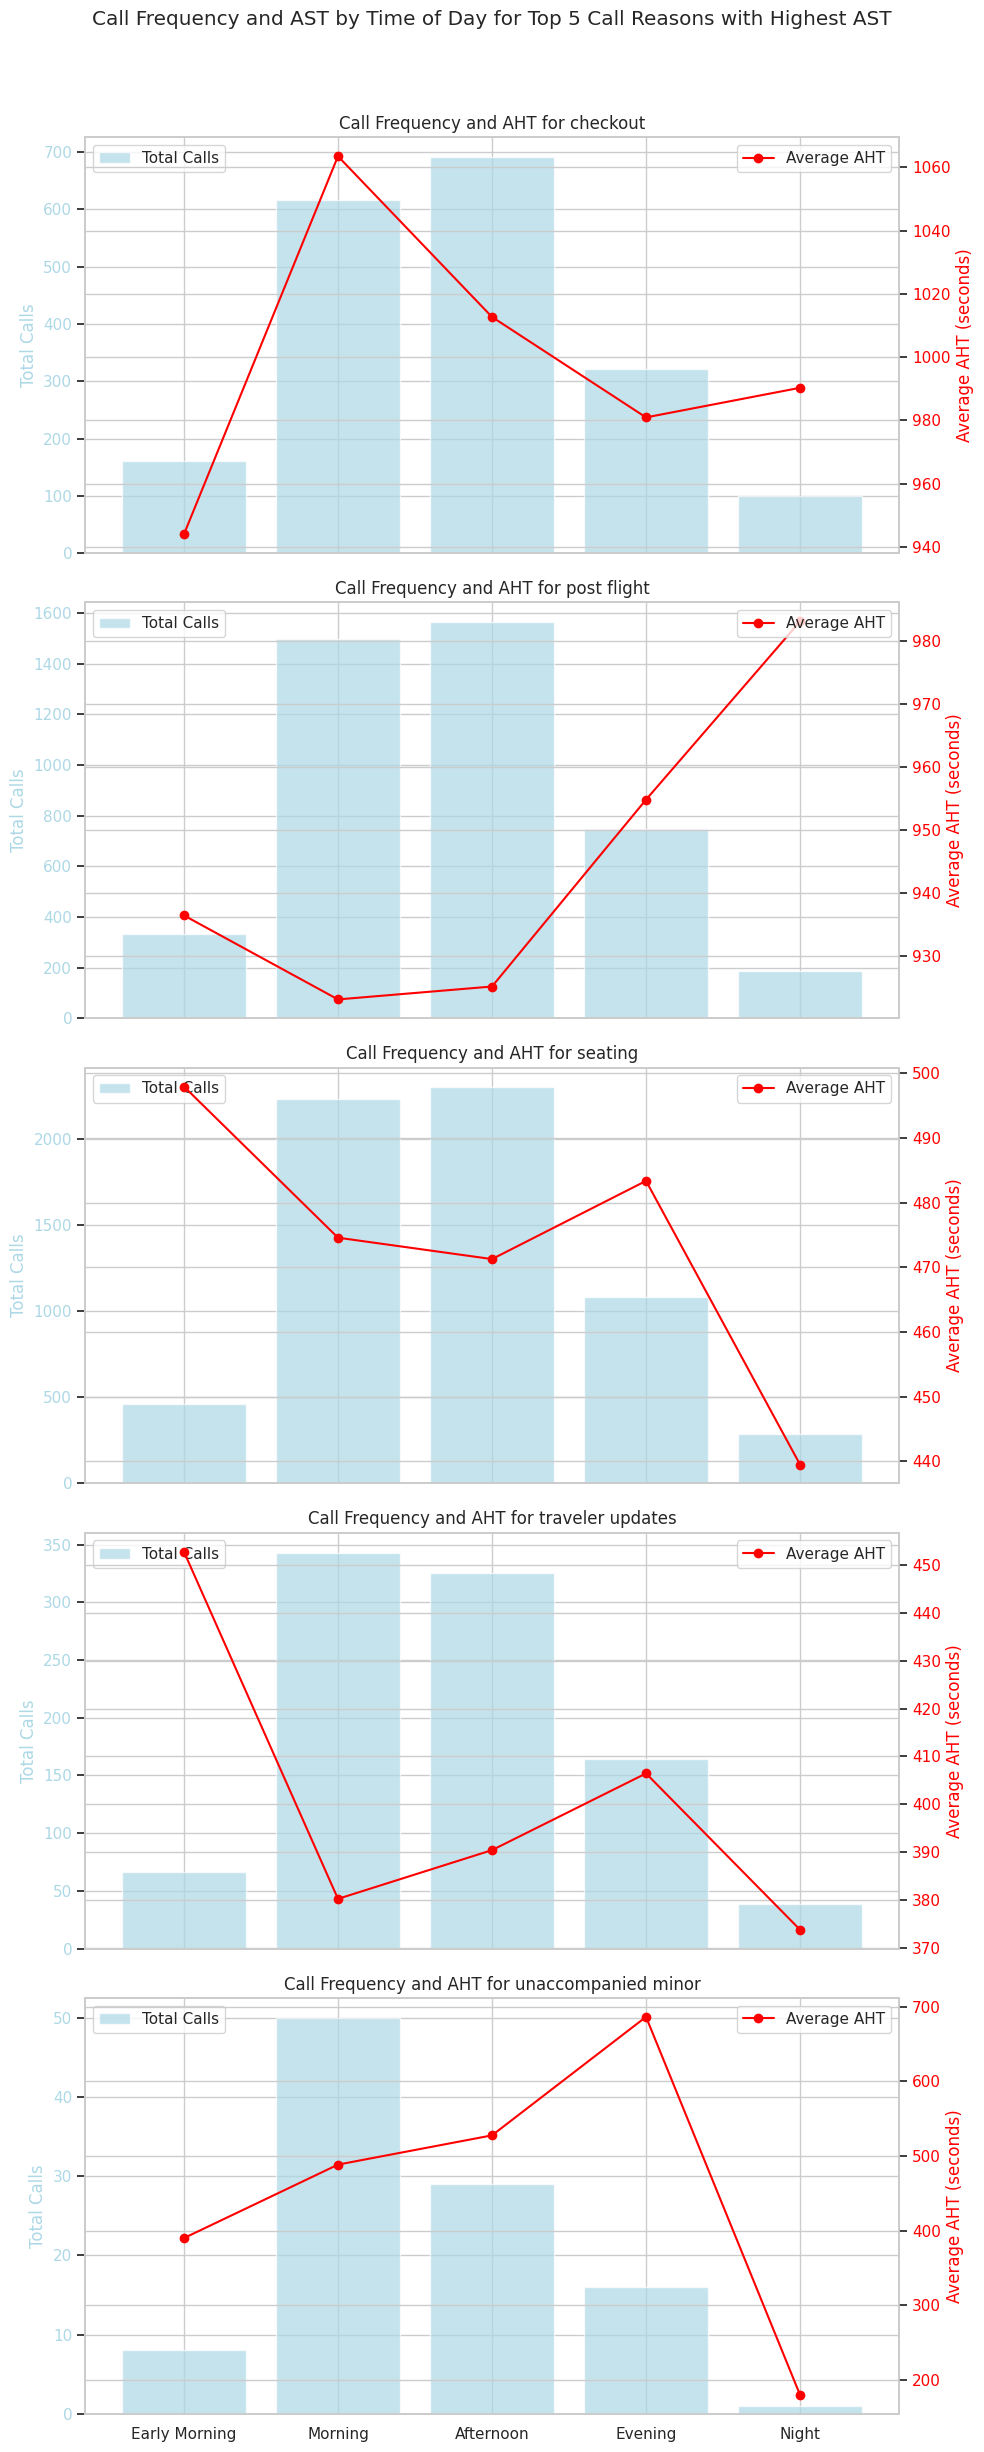

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your DataFrame already loaded with relevant data

# 1. Group by primary_call_reason to calculate mean AHT and find the top 5 call reasons by AHT
top_aht_reasons = df.groupby('primary_call_reason')['AST'].mean().nlargest(5).index.tolist()

# 2. Filter the DataFrame for only the top 5 call reasons by AHT
df_top_aht_reasons = df[df['primary_call_reason'].isin(top_aht_reasons)]

# 3. Group by time_of_day and primary_call_reason to get total calls and average AHT
time_of_day_analysis = df_top_aht_reasons.groupby(['time_of_day', 'primary_call_reason']).agg(
    total_calls=('call_id', 'count'),  # Count the number of calls using 'call_id'
    average_aht=('AHT', 'mean')        # Calculate the mean AHT
).reset_index()

# 4. Define the order of time slots
time_order = ['Early Morning', 'Morning', 'Afternoon', 'Evening', 'Night']
time_of_day_analysis['time_of_day'] = pd.Categorical(time_of_day_analysis['time_of_day'], categories=time_order, ordered=True)

# 5. Sorting the DataFrame based on the specified time order
time_of_day_analysis = time_of_day_analysis.sort_values('time_of_day')

# 6. Create subplots for each of the top 5 call reasons with the highest AHT
unique_reasons = time_of_day_analysis['primary_call_reason'].unique()
n_reasons = len(unique_reasons)

fig, axes = plt.subplots(n_reasons, 1, figsize=(10, n_reasons * 5), sharex=True)

for i, reason in enumerate(unique_reasons):
    ax = axes[i]
    reason_data = time_of_day_analysis[time_of_day_analysis['primary_call_reason'] == reason]

    # Bar plot for total calls
    color = 'lightblue'
    ax.bar(reason_data['time_of_day'], reason_data['total_calls'], color=color, alpha=0.7, label='Total Calls')
    ax.set_ylabel('Total Calls', color=color)
    ax.tick_params(axis='y', labelcolor=color)

    # Line plot for AHT
    color = 'red'
    ax2 = ax.twinx()
    ax2.plot(reason_data['time_of_day'], reason_data['average_aht'], color=color, marker='o', label='Average AHT')
    ax2.set_ylabel('Average AHT (seconds)', color=color)
    ax2.tick_params(axis='y', labelcolor=color)

    # Title for each subplot
    ax.set_title(f'Call Frequency and AHT for {reason}')

    # Legends
    ax.legend(loc='upper left')
    ax2.legend(loc='upper right')

# Overall title
plt.suptitle('Call Frequency and AST by Time of Day for Top 5 Call Reasons with Highest AST')
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to fit title
plt.show()
